In [ ]:
# Install necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()



Saving Heart Disease data.csv to Heart Disease data.csv


In [ ]:
# Extract
heart_df=pd.read_csv("Heart Disease data.csv")
# Check the first few rows of the dataset
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Check for missing values
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Explore data statistics
print(heart_df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [ ]:
# EDA: Exploratory Data Analysis
# Visualize heart disease rates
heart_disease_rate = heart_df['target'].mean()
print("Heart Disease Rate:", heart_disease_rate)

Heart Disease Rate: 0.5131707317073171


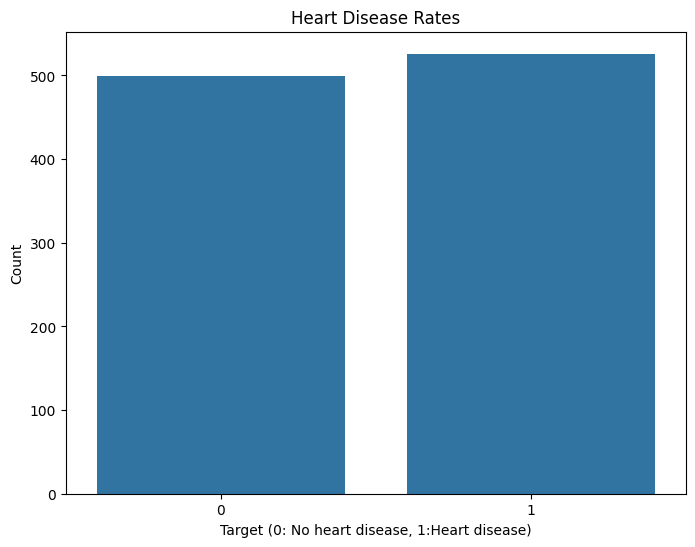

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=heart_df)
plt.title('Heart Disease Rates')
plt.xlabel('Target (0: No heart disease, 1:Heart disease)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Compare heart disease by gender
heart_disease_by_gender = heart_df.groupby('sex')['target'].mean()
print("Heart Disease by Gender:")
print(heart_disease_by_gender)


Heart Disease by Gender:
sex
0    0.724359
1    0.420757
Name: target, dtype: float64


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='target',data=heart_df)
plt.title('Heart Disese by Gender')
plt.xlabel('Gender (0:Female, 1:Male)')
plt.ylabel('Count')
plt.legend(title='Target',labels=['No Heart Disease','Heart Disease'])
plt.show()

In [ ]:
# Compare heart disease by age
heart_disease_by_age = heart_df.groupby(pd.cut(heart_df['age'], bins=[20, 40, 60, 80, 100]))['target'].mean()
print("Heart Disease by Age:")
print(heart_disease_by_age)


Heart Disease by Age:
age
(20, 40]     0.661765
(40, 60]     0.540146
(60, 80]     0.408088
(80, 100]         NaN
Name: target, dtype: float64


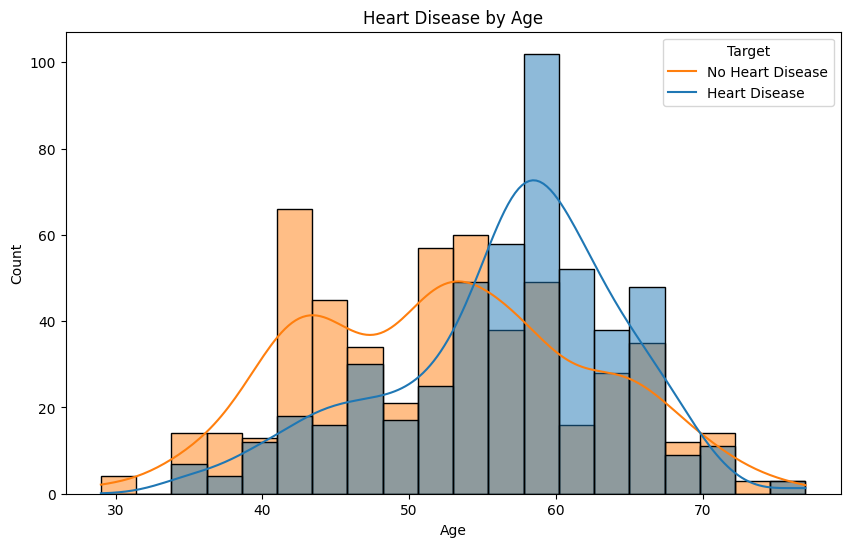

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=heart_df,x='age',hue='target',bins=20,kde=True)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target',labels=['No Heart Disease','Heart Disease'])
plt.show()

In [ ]:
#Comapre Heart Disease Rates by Age Group
age_bins = [20, 40, 60, 80]
age_labels = ['20-39', '40-59', '60-79']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels)
age_heart_disease = heart_df.groupby('age_group')['target'].mean().reset_index()


In [ ]:
fig3 = px.bar(age_heart_disease, x='age_group', y='target', title='Heart Disease Rates by Age Group',
              labels={'age_group': 'Age Group', 'target': 'Heart Disease Rate'})
fig3.update_layout(yaxis=dict(title='Heart Disease Rate'))


In [ ]:
#Compare Age vs Maximum Heart Rate by Gender
fig = px.bar(heart_df, x="age", y="thalach", color="sex", title="Age vs. Maximum Heart Rate by Gender")
fig.show()

In [ ]:
correlation = heart_df['age'].corr(heart_df['target'])
print("Correlation between Age and Heart Disease:", correlation)

Correlation between Age and Heart Disease: -0.22932355126761114


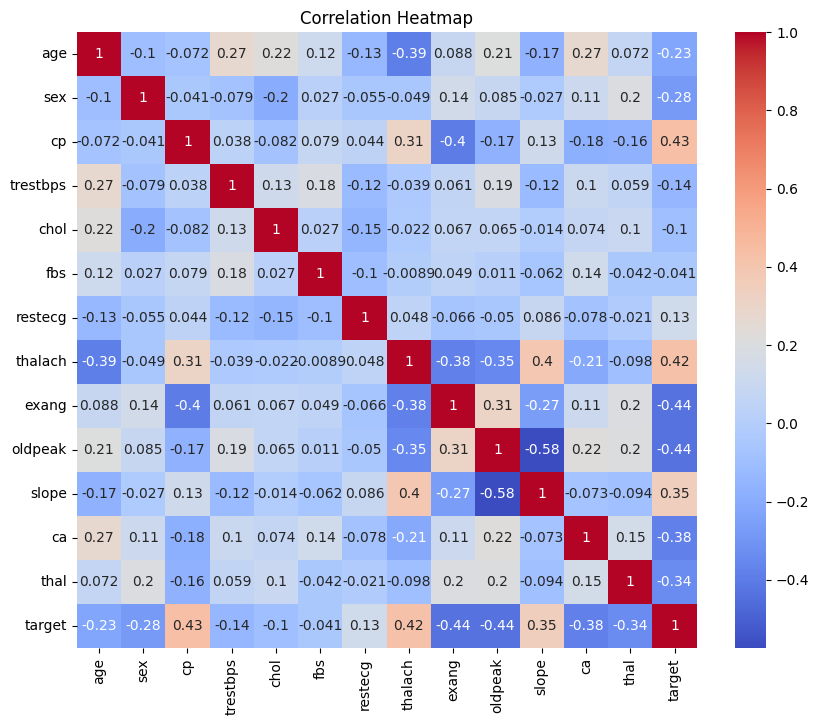

In [ ]:
#Visualizing Correlation
plt.figure(figsize=(10, 8))

# Drop non-numeric columns
numeric_data = heart_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
mean_chol_with_disease = heart_df[heart_df['target'] == 1]['chol'].mean()
mean_chol_without_disease = heart_df[heart_df['target'] == 0]['chol'].mean()

print("Mean Cholesterol Level (with Heart Disease):", mean_chol_with_disease)
print("Mean Cholesterol Level (without Heart Disease):", mean_chol_without_disease)


Mean Cholesterol Level (with Heart Disease): 240.97908745247148
Mean Cholesterol Level (without Heart Disease): 251.2925851703407


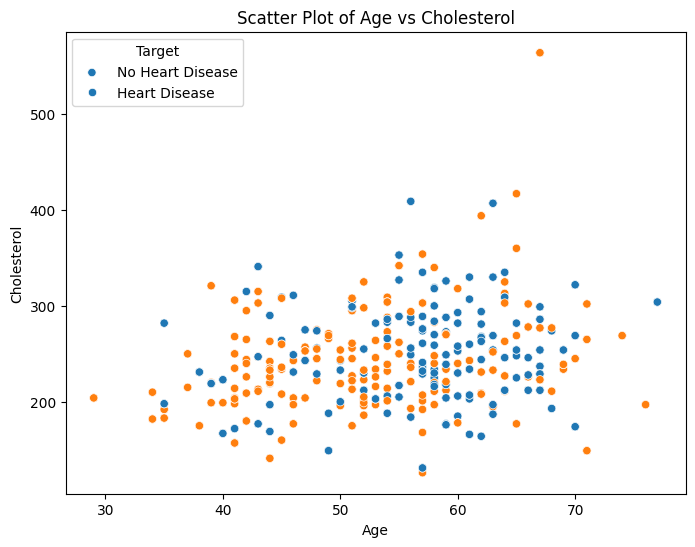

In [ ]:
#Compare Age and Cholestrol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=heart_df)
plt.title('Scatter Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()


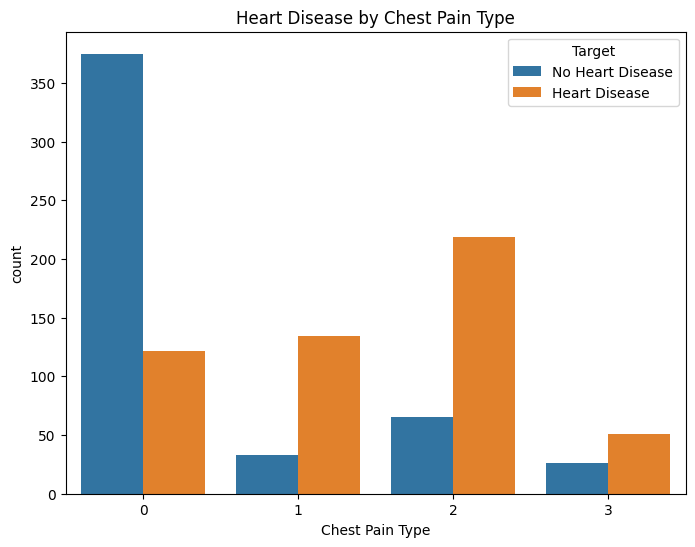

In [ ]:
#Comapre Heart Disease by Chest Pain Type
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=heart_df)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

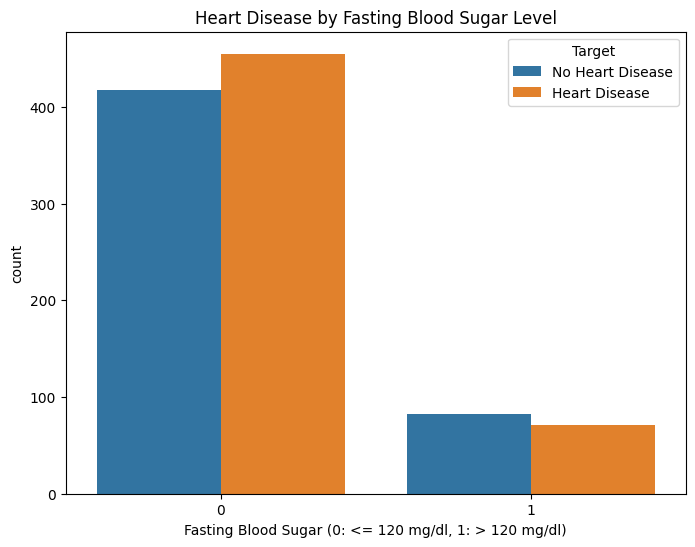

In [ ]:
#Compare Heart Disease by Fasting Blood Sugar Level
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='target', data=heart_df)
plt.title('Heart Disease by Fasting Blood Sugar Level')
plt.xlabel('Fasting Blood Sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [ ]:
#Key Metrics
total_patients = len(heart_df)
heart_disease_patients = heart_df['target'].sum()
total_no_heart_disease = total_samples - total_heart_disease
heart_disease_rate = (heart_disease_patients / total_patients) * 100


In [ ]:
print('Key Metrics:')
print('Total Patients:', total_patients)
print('Total Heart Disease Cases:', heart_disease_patients)
print('Total No Heart Disease Cases:', total_no_heart_disease)
print('Heart Disease Rate: {:.2f}%'.format(heart_disease_rate))

Key Metrics:
Total Patients: 1025
Total Heart Disease Cases: 526
Total No Heart Disease Cases: 499
Heart Disease Rate: 51.32%


In [ ]:
num_female = len(heart_df[heart_df['sex'] == 0])
num_male = len(heart_df[heart_df['sex'] == 1])
num_no_disease = len(heart_df[heart_df['target'] == 0])
num_with_disease = len(heart_df[heart_df['target'] == 1])

print("Key Metrics:")
print("Total number of female patients:", num_female)
print("Total number of male patients:", num_male)
print("Heart disease rate among female patients: {:.2f}%".format((num_with_disease / num_female) * 100))
print("Heart disease rate among male patients: {:.2f}%".format((num_with_disease / num_male) * 100))


Key Metrics:
Total number of female patients: 312
Total number of male patients: 713
Heart disease rate among female patients: 168.59%
Heart disease rate among male patients: 73.77%


In [ ]:
# Calculate average age of patients with heart disease and without heart disease
avg_age_heart_disease = heart_df[heart_df['target'] == 1]['age'].mean()
avg_age_no_heart_disease = heart_df[heart_df['target'] == 0]['age'].mean()

print("Average Age of Patients with Heart Disease:", avg_age_heart_disease)
print("Average Age of Patients without Heart Disease:", avg_age_no_heart_disease)


Average Age of Patients with Heart Disease: 52.40874524714829
Average Age of Patients without Heart Disease: 56.569138276553105


In [ ]:
# Calculate percentage of males and females with heart disease
total_male = heart_df[heart_df['sex'] == 1].shape[0]
total_female = heart_df[heart_df['sex'] == 0].shape[0]
male_heart_disease_percentage = (heart_df[(heart_df['sex'] == 1) & (heart_df['target'] == 1)].shape[0] / total_male) * 100
female_heart_disease_percentage = (heart_df[(heart_df['sex'] == 0) & (heart_df['target'] == 1)].shape[0] / total_female) * 100

print("Percentage of Males with Heart Disease:", male_heart_disease_percentage)
print("Percentage of Females with Heart Disease:", female_heart_disease_percentage)

Percentage of Males with Heart Disease: 42.07573632538569
Percentage of Females with Heart Disease: 72.43589743589743


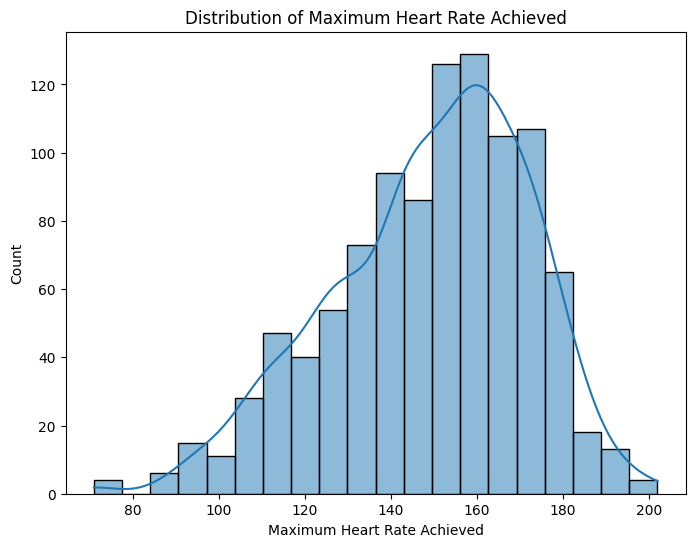

In [ ]:
#Distribution of Maximum Heart Rate Achieved
plt.figure(figsize=(8, 6))
sns.histplot(x='thalach', data=heart_df, kde=True)
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.show()

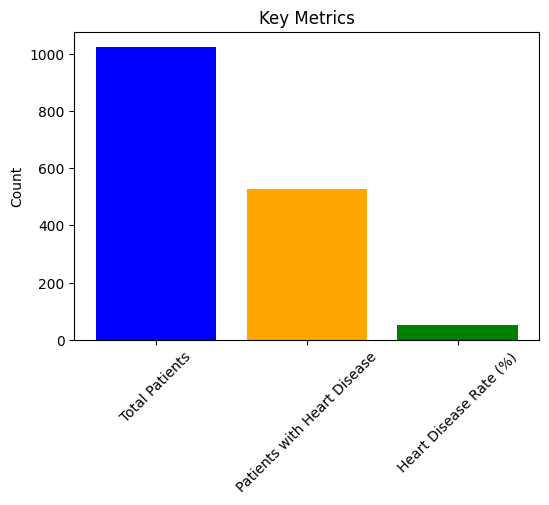

In [ ]:
#Key Metrics
plt.figure(figsize=(6, 4))
plt.bar(["Total Patients", "Patients with Heart Disease", "Heart Disease Rate (%)"],
        [total_patients, heart_disease_patients, heart_disease_rate],
        color=['blue', 'orange', 'green'])
plt.title('Key Metrics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()